**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

**Warning**: the following cell may take close to 30 minutes to run, or more depending on your hardware.

In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

vm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  11.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END .............................C=100.0, kernel=linear; total time=   7.5s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [142]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.61835677129

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [143]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

**Warning**: the following cell may take close to 45 minutes to run, or more depending on your hardware.

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
         'kernel': ['linear', 'rbf'],
         'C': reciprocal(20, 200000),
         'gamma': expon(scale=0.1),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=0.3010121430917521, kernel=linear; total time=  12.1s
[CV] END C=629.782329591372, gamma=0.3010121430917521, kernel=linear; total time=   7.6s
[CV] END C=629.782329591372, gamma=0.3010121430917521, kernel=linear; total time=   7.6s
[CV] END C=629.782329591372, gamma=0.3010121430917521, kernel=linear; total time=   7.6s
[CV] END C=629.782329591372, gamma=0.3010121430917521, kernel=linear; total time=   7.6s
[CV] END C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf; total time=  13.8s
[CV] END C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf; total time=  13.9s
[CV] END C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf; total time=  13.9s
[CV] END C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf; total time=  13.8s
[CV] END C=26290.206464300216, gamma=0.09084469696321254, kernel=rbf; total time=  13.8s
[CV] END C=84.14107900575871, gamma=0.0059838768

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f38191e4350>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f38191d69d0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [148]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

55411.52431535983

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [149]:
rnd_search.best_params_

{'C': 151136.20282548846, 'gamma': 0.14922453771381408, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

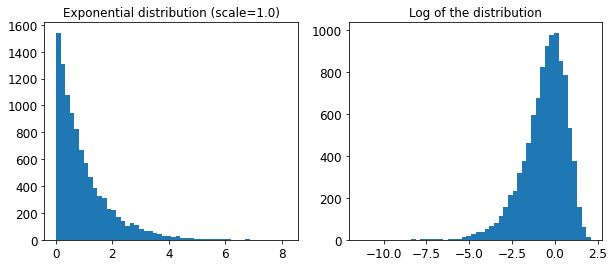

In [151]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of the distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

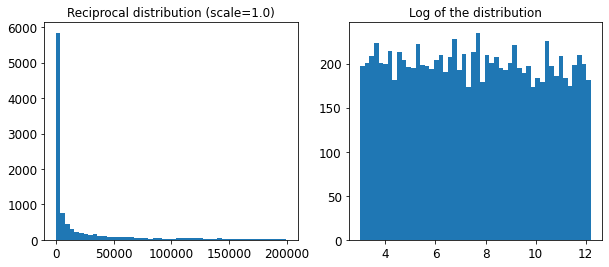

In [152]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of the distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [115]:
k = 5

Now let's look for the indices of the top k features:

In [116]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [117]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features:

In [119]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [135]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [136]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [137]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

Now let's double check that these are indeed the top k features:

In [138]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [155]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [156]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

Let's try the full pipeline on a few instances:

In [157]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Prediction:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Prediction:	 [ 86270.24495334 295092.91948504  99017.6477771  153065.85534555]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

**Warning**: the following cell may take close to 45 minutes to run, or more depending on your hardware.

**Note:** In the code below, I've set the `OneHotEncoder`'s `handle_unknown` hyperparameter to `'ignore'`, to avoid warnings during training. Without this, the `OneHotEncoder` would default to `handle_unknown='error'`, meaning that it would raise an error when transforming any data containing a category it didn't see during training. If we kept the default, then the `GridSearchCV` would run into errors during training when evaluating the folds in which not all the categories are in the training set. This is likely to happen since there's only one sample in the `'ISLAND'` category, and it may end up in the test set in some of the folds. So some folds would just be dropped by the `GridSearchCV`, and it's best to avoid that.

In [159]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  10.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  10.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  10.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  10.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  10.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  12.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  10.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  10.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  10.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  11.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  11.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  11.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  13.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  13.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  13.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  11.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  11.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  13.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  13.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  14.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  14.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  14.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  14.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  14.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  14.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  11.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  14.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  14.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  14.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  12.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  15.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  16.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  16.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  15.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  15.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  15.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  17.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  16.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  16.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  16.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  14.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  18.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  15.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  18.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  15.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  18.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  17.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  18.4s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  19.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  18.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  15.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  20.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  19.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  18.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  19.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  17.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  20.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  16.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  18.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  20.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  18.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  17.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  22.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  20.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  20.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  21.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  20.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  20.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  19.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  22.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  20.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  22.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  18.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  21.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  21.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  23.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noq

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  20.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  21.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  20.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  22.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  21.8s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  22.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  23.8s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  23.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  24.4s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       

In [161]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.

Congratulations! You already know quite a lot about Machine Learning. :)